In [29]:
#聚类的可视化 https://www.naftaliharris.com/blog/visualizing-k-means-clustering/
#dbscanhttps://www.naftaliharris.com/blog/visualizing-dbscan-clustering/
#算法分析 K个质心选择敏感；K值选取问题；非球状的问题(密度聚类)；数据大收敛慢

import numpy as np
import matplotlib.pyplot as plt

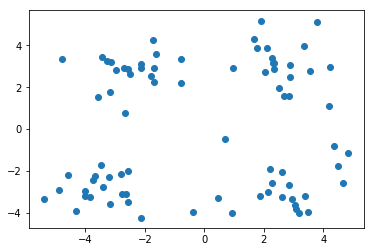

In [30]:
data = np.genfromtxt("testSet.txt",delimiter="")

#print(data)
plt.scatter(data[:,0],data[:,1])
plt.show()

In [31]:
def enclDistance(vector1,vector2):
    return np.sqrt(sum((vector2 - vector1)**2))

def initCentroids(data,k):
    numSamples,dim = data.shape
    #k个质心，列数跟样本的列数一样
    centroids = np.zeros((k,dim))
    #随机选出k个质心
    for i in range(k):
        #随机选出一个样本的索引
        index = int(np.random.uniform(0,numSamples))
        #作为初始化的质心
        centroids[i,:] = data[index,:]#四个初始化的质心
    return centroids

def kmeans(data,k):
    #
    numSamples = data.shape[0]
    #样本的属性，第一列保存该样本属于哪个簇，第二列保存该样本跟它所属的误差(距离)
    clusterData = np.array(np.zeros((numSamples,2)))
    clusterChanged = True
    
    centroids = initCentroids(data,k)
    
    while clusterChanged:
        clusterChanged = False
        #循环每一个样本
        for i in range(numSamples):
            #最小距离
            minDist = 100000.0
            #定义样本所属的簇
            minIndex = 0
            #循环每个样本与质心之间的距离
            for j in range(k):
                #循环每一个质心和样本，计算距离
                distance = enclDistance(centroids[j,:],data[i,:])
                #如果计算的距离小于最小距离，更新最小距离
                if distance < minDist:
                    minDist = distance
                    #更新
                    clusterData[i,1] = minDist
                    #
                    minIndex = j
                    
            #如果样本的属性的簇发生了变化,第0列，表示簇
            if clusterData[i,0] != minIndex:
                #质心要重新计算
                clusterChanged = True
                clusterData[i,0] = minIndex
                    
        for j in range(k):
            #获取第j个簇所有的样本所在的索引
            cluster_index = np.nonzero(clusterData[:,0] == j)
            #第j个簇所有的样本点
            pointsInCluster = data[cluster_index]
            #计算质心
            centroids[j,:] = np.mean(pointsInCluster,axis = 0)
            
    return centroids,clusterData

def showCluster(data,k,centroids,clusterData):
    numSamples,dim = data.shape
    
    if dim !=2:
        print("dimension of your data is not 2!")
        return 1
    
    mark = ['or','ob','og','ok','-r','+r','sr','dr','<r','pr']
    if k > len(mark):
        print("your k is too large!")
        return 1
    
    for i in range(numSamples):
        markIndex = int(clusterData[i,0])
        plt.plot(data[i,0],data[i,1],mark[markIndex])
    mark = ['*r','*b','*g','*k','^b','+b','sb','db','<b','pb']
    
    for i in range(k):
        plt.plot(centroids[i,0],centroids[i,1],mark[i],markersize=20)
    plt.show()

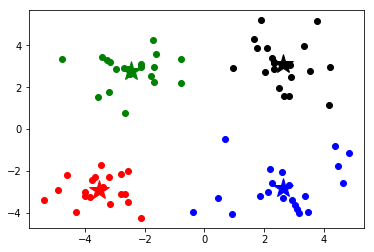

'     \n验证 k值 暂时注释掉\ncentroids = min_loss_centroids\nclusterData = min_loss_clusterData\nshowCluster(data,k,centroids,clusterData)\n'

In [43]:
#1，质心优化：选择代价函数最小的一个 *****重要
k = 4#如何选择 “肘部法则”

min_loss = 10000
min_loss_centroids = np.array([])
min_loss_clusterData = np.array([])

for i in range(50):

    centroids,clusterData = kmeans(data,k)
    loss = sum(clusterData[:,1])/data.shape[0]#初始值的选取，做很多次选取loss小的，第一个是距离，距离求和再求平均值 最终得到losss

    if loss < min_loss:
        min_loss = loss
        min_loss_centroids = centroids
        min_loss_clusterData = clusterData

centroids = min_loss_centroids
clusterData = min_loss_clusterData
showCluster(data,k,centroids,clusterData)
"""     
验证 k值 暂时注释掉
centroids = min_loss_centroids
clusterData = min_loss_clusterData
showCluster(data,k,centroids,clusterData)
"""   

In [53]:
#2 K值选择
k = 4#如何选择 “肘部法则”

list_loss = []

for k in range(2,10):

    #质心优化：选择代价函数最小的一个 *****重要
    min_loss = 10000
    min_loss_centroids = np.array([])
    min_loss_clusterData = np.array([])

    for i in range(50):

        centroids,clusterData = kmeans(data,k)
        loss = sum(clusterData[:,1])/data.shape[0]#初始值的选取，做很多次选取loss小的

        if loss < min_loss:
            min_loss = loss
            min_loss_centroids = centroids
            min_loss_clusterData = clusterData
    list_loss.append(min_loss)


'     \n验证 k值 暂时注释掉\ncentroids = min_loss_centroids\nclusterData = min_loss_clusterData\nshowCluster(data,k,centroids,clusterData)\n'

In [33]:
list_loss

[2.9811811738953176,
 1.9708559728104191,
 1.1675654672086735,
 1.0712368269135584,
 1.0064227003008,
 0.9456523281363699,
 0.8864275176618743,
 0.8401561632805088]

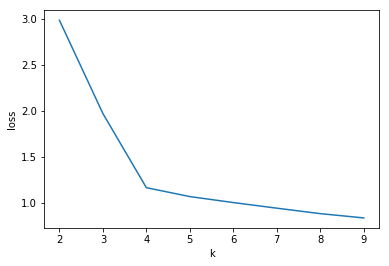

In [34]:
plt.plot(range(2,10),list_loss)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()#选取4比较合适

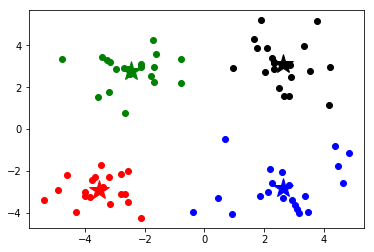

In [44]:
k = 4
centroids = min_loss_centroids
clusterData = min_loss_clusterData
showCluster(data,k,centroids,clusterData)

In [45]:
centroids

array([[-3.53973889, -2.89384326],
       [ 2.65077367, -2.79019029],
       [-2.46154315,  2.78737555],
       [ 2.6265299 ,  3.10868015]])

In [46]:
#测试
x_test = [0,1]
np.tile(x_test,(k,1))

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [47]:
np.tile(x_test,(k,1)) - centroids

array([[ 3.53973889,  3.89384326],
       [-2.65077367,  3.79019029],
       [ 2.46154315, -1.78737555],
       [-2.6265299 , -2.10868015]])

In [48]:
np.tile(x_test,(k,1)) - centroids ** 2

array([[-12.52975144,  -7.37432883],
       [ -7.02660103,  -6.78516183],
       [ -6.05919468,  -6.76946246],
       [ -6.89865932,  -8.66389228]])

In [49]:
(np.tile(x_test,(k,1)) - centroids ** 2).sum(axis=1)

array([-19.90408027, -13.81176286, -12.82865714, -15.56255159])

In [50]:
np.argmin(((np.tile(x_test,(k,1)) - centroids ** 2).sum(axis=1)))

0

In [51]:
def predict(datas):
    return np.array([np.argmin(((np.tile(data,(k,1)) - centroids) ** 2).sum(axis=1)) for data in datas])

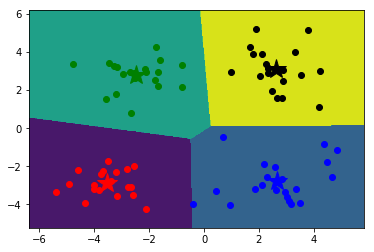

In [52]:
x_min,x_max = data[:,0].min() -1,data[:,0].max() + 1
y_min,y_max = data[:,1].min() -1,data[:,1].max() + 1

xx,yy = np.meshgrid(np.arange(x_min,x_max,0.02),
                   np.arange(y_min,y_max,0.02))

z = predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

cs = plt.contourf(xx,yy,z)
showCluster(data,k,centroids,clusterData)